In [135]:
import pandas as pd
import numpy as np
import datetime
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pickle

# Offline Sales

Esta parte do código será referente à análise das vendas na loja física. Sendo assim, todas as variáveis criadas terminarão com a silga **ofs** para facilitar a identificação e escrita do código.

In [136]:
# Descobrir o número de linhas do arquivo
number_lines_ofs = 0
with open('offline_sales.json') as f:
    for line in f:
        number_lines_ofs += 1

print("O número de linhas presente no arquivo ofs é igual a:", number_lines_ofs)

O número de linhas presente no arquivo ofs é igual a: 29372


In [137]:
# Abrindo o arquivo json
df_ofs = pd.read_json('offline_sales.json',lines=True,dtype=False)

# Criando uma coluna que será útil depois
df_ofs['price_quantity'] = df_ofs['price'] * df_ofs['quantity'] 

# Verificação das primeiras linhas
df_ofs.head(10)
# type(df_ofs)

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id,price_quantity
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,None,279.0
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,None,229.0
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,None,179.0
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,None,269.0
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,None,29.0
5,2018-08-01,RN,3162633,626462353638383,616339353035393,1,459.0,None,459.0
6,2018-08-01,RN,3162633,653363623539323,346165376638356,1,369.0,None,369.0
7,2018-08-01,RN,3162633,666639323036376,643839313363376,1,149.0,30373934343338363136,149.0
8,2018-08-01,RN,3162633,636238633865636,333835396465353,1,198.0,30393833353363303832,198.0
9,2018-08-01,RN,3162633,626239383061353,343332613639373,1,229.0,31366262653431626130,229.0


### Análise do faturamento

#### Faturamento total 

In [138]:
# Somando o faturamento em lojas físicas
income_ofs = df_ofs['price_quantity'].sum()

print("O faturamento das lojas físicas nesse período foi de: R$", income_ofs)

O faturamento das lojas físicas nesse período foi de: R$ 13903005.32


#### Faturamento por estado

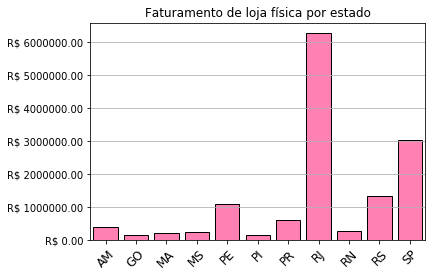

In [139]:
df_income_state_ofs = df_ofs.drop(['customer_id','date', 'off_product_id', 'sale_id', 
                                  'store_id'], axis=1)

g_income_state_ofs = df_income_state_ofs.groupby('state')['price_quantity'].sum()

# Plot
my_index = tuple(g_income_state_ofs.index)
values = g_income_state_ofs.values
plt.bar(np.arange(0.5,11.5),values, color="#ff80b3", ec='black') 
plt.xticks(np.arange(0.5,12.5), my_index, rotation=45, fontsize=12)
plt.xlim(0, 11)
plt.title("Faturamento de loja física por estado")
plt.grid(b=True, axis='y')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('R$ %.2f'))
plt.show() 


### Análise para entender o que significa store_id

In [140]:
# Descobrindo o número de estados e de store_id existentes na tabela analisada
unique_states_ofs = df_ofs['state'].unique()
print('Número de estados presentes no arquivo:',len(unique_states_ofs))

unique_store_id_ofs = df_ofs['store_id'].unique()
print('Número de store_id presentes no arquivo:',len(unique_store_id_ofs))

# Analisando quantos store_id existem por estado
g_store_state_ofs = df_ofs.groupby('state')
g_store_state_ofs = g_store_state_ofs.apply(lambda s: len(s['store_id'].unique()))
print("\nNúmero de store_id por estado:\n",g_store_state_ofs)

Número de estados presentes no arquivo: 11
Número de store_id presentes no arquivo: 39

Número de store_id por estado:
 state
AM     2
GO     1
MA     1
MS     1
PE     3
PI     1
PR     3
RJ    13
RN     1
RS     3
SP    10
dtype: int64


### Análise sobre quantidade de lojas físicas por estado

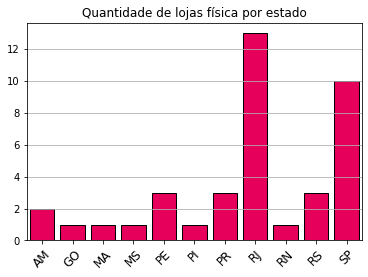

In [141]:
# Plot
my_index = tuple(g_income_state_ofs.index)
values = g_store_state_ofs.values
plt.bar(np.arange(0.5,11),values, color="#e6005c", ec='black') 
plt.xticks(np.arange(0.5,12.5), my_index, rotation=45, fontsize=12)
plt.xlim(0,11)
plt.title("Quantidade de lojas física por estado")
plt.grid(b=True, axis='y')
plt.show() 

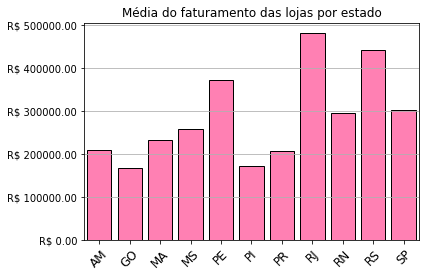

In [142]:
# Considerando o número de lojas por estado e analisando o faturamento por estado novamente

# Plot
my_index = tuple(g_income_state_ofs.index)
values = g_income_state_ofs.values/g_store_state_ofs.values
plt.bar(np.arange(0.5,11),values, color="#ff80b3", ec='black') 
plt.xticks(np.arange(0.5,12.5), my_index, rotation=45, fontsize=12)
plt.xlim(0,11)
plt.title("Média do faturamento das lojas por estado")
plt.grid(b=True, axis='y')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('R$ %.2f'))
plt.show() 


### Análise sobre os cariocas gostarem de comprar no final de semana

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


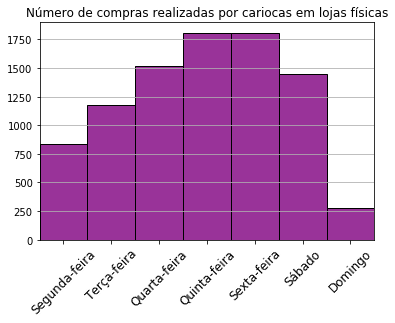

In [143]:
# Analisando as linhas em que o estado é igual a RJ e criando mais uma coluna referente ao dia da semana
df_state_rj_ofs = df_ofs.loc[df_ofs['state'] == "RJ"]
df_state_rj_ofs['weekday'] = df_state_rj_ofs['date'].dt.dayofweek

# Plot
my_index = ('Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira', 'Sexta-feira', 'Sábado','Domingo')
bins = range(8)
counts_ofs, bins_ofs, bars_ofs = plt.hist(df_state_rj_ofs['weekday'], bins=bins, color="#993399", ec='black') 
plt.xticks(np.arange(0.5,7, 1), my_index, rotation=45, fontsize=12)
plt.xlim(0,7)
plt.title("Número de compras realizadas por cariocas em lojas físicas")
plt.grid(b=True, axis='y')
plt.show() 

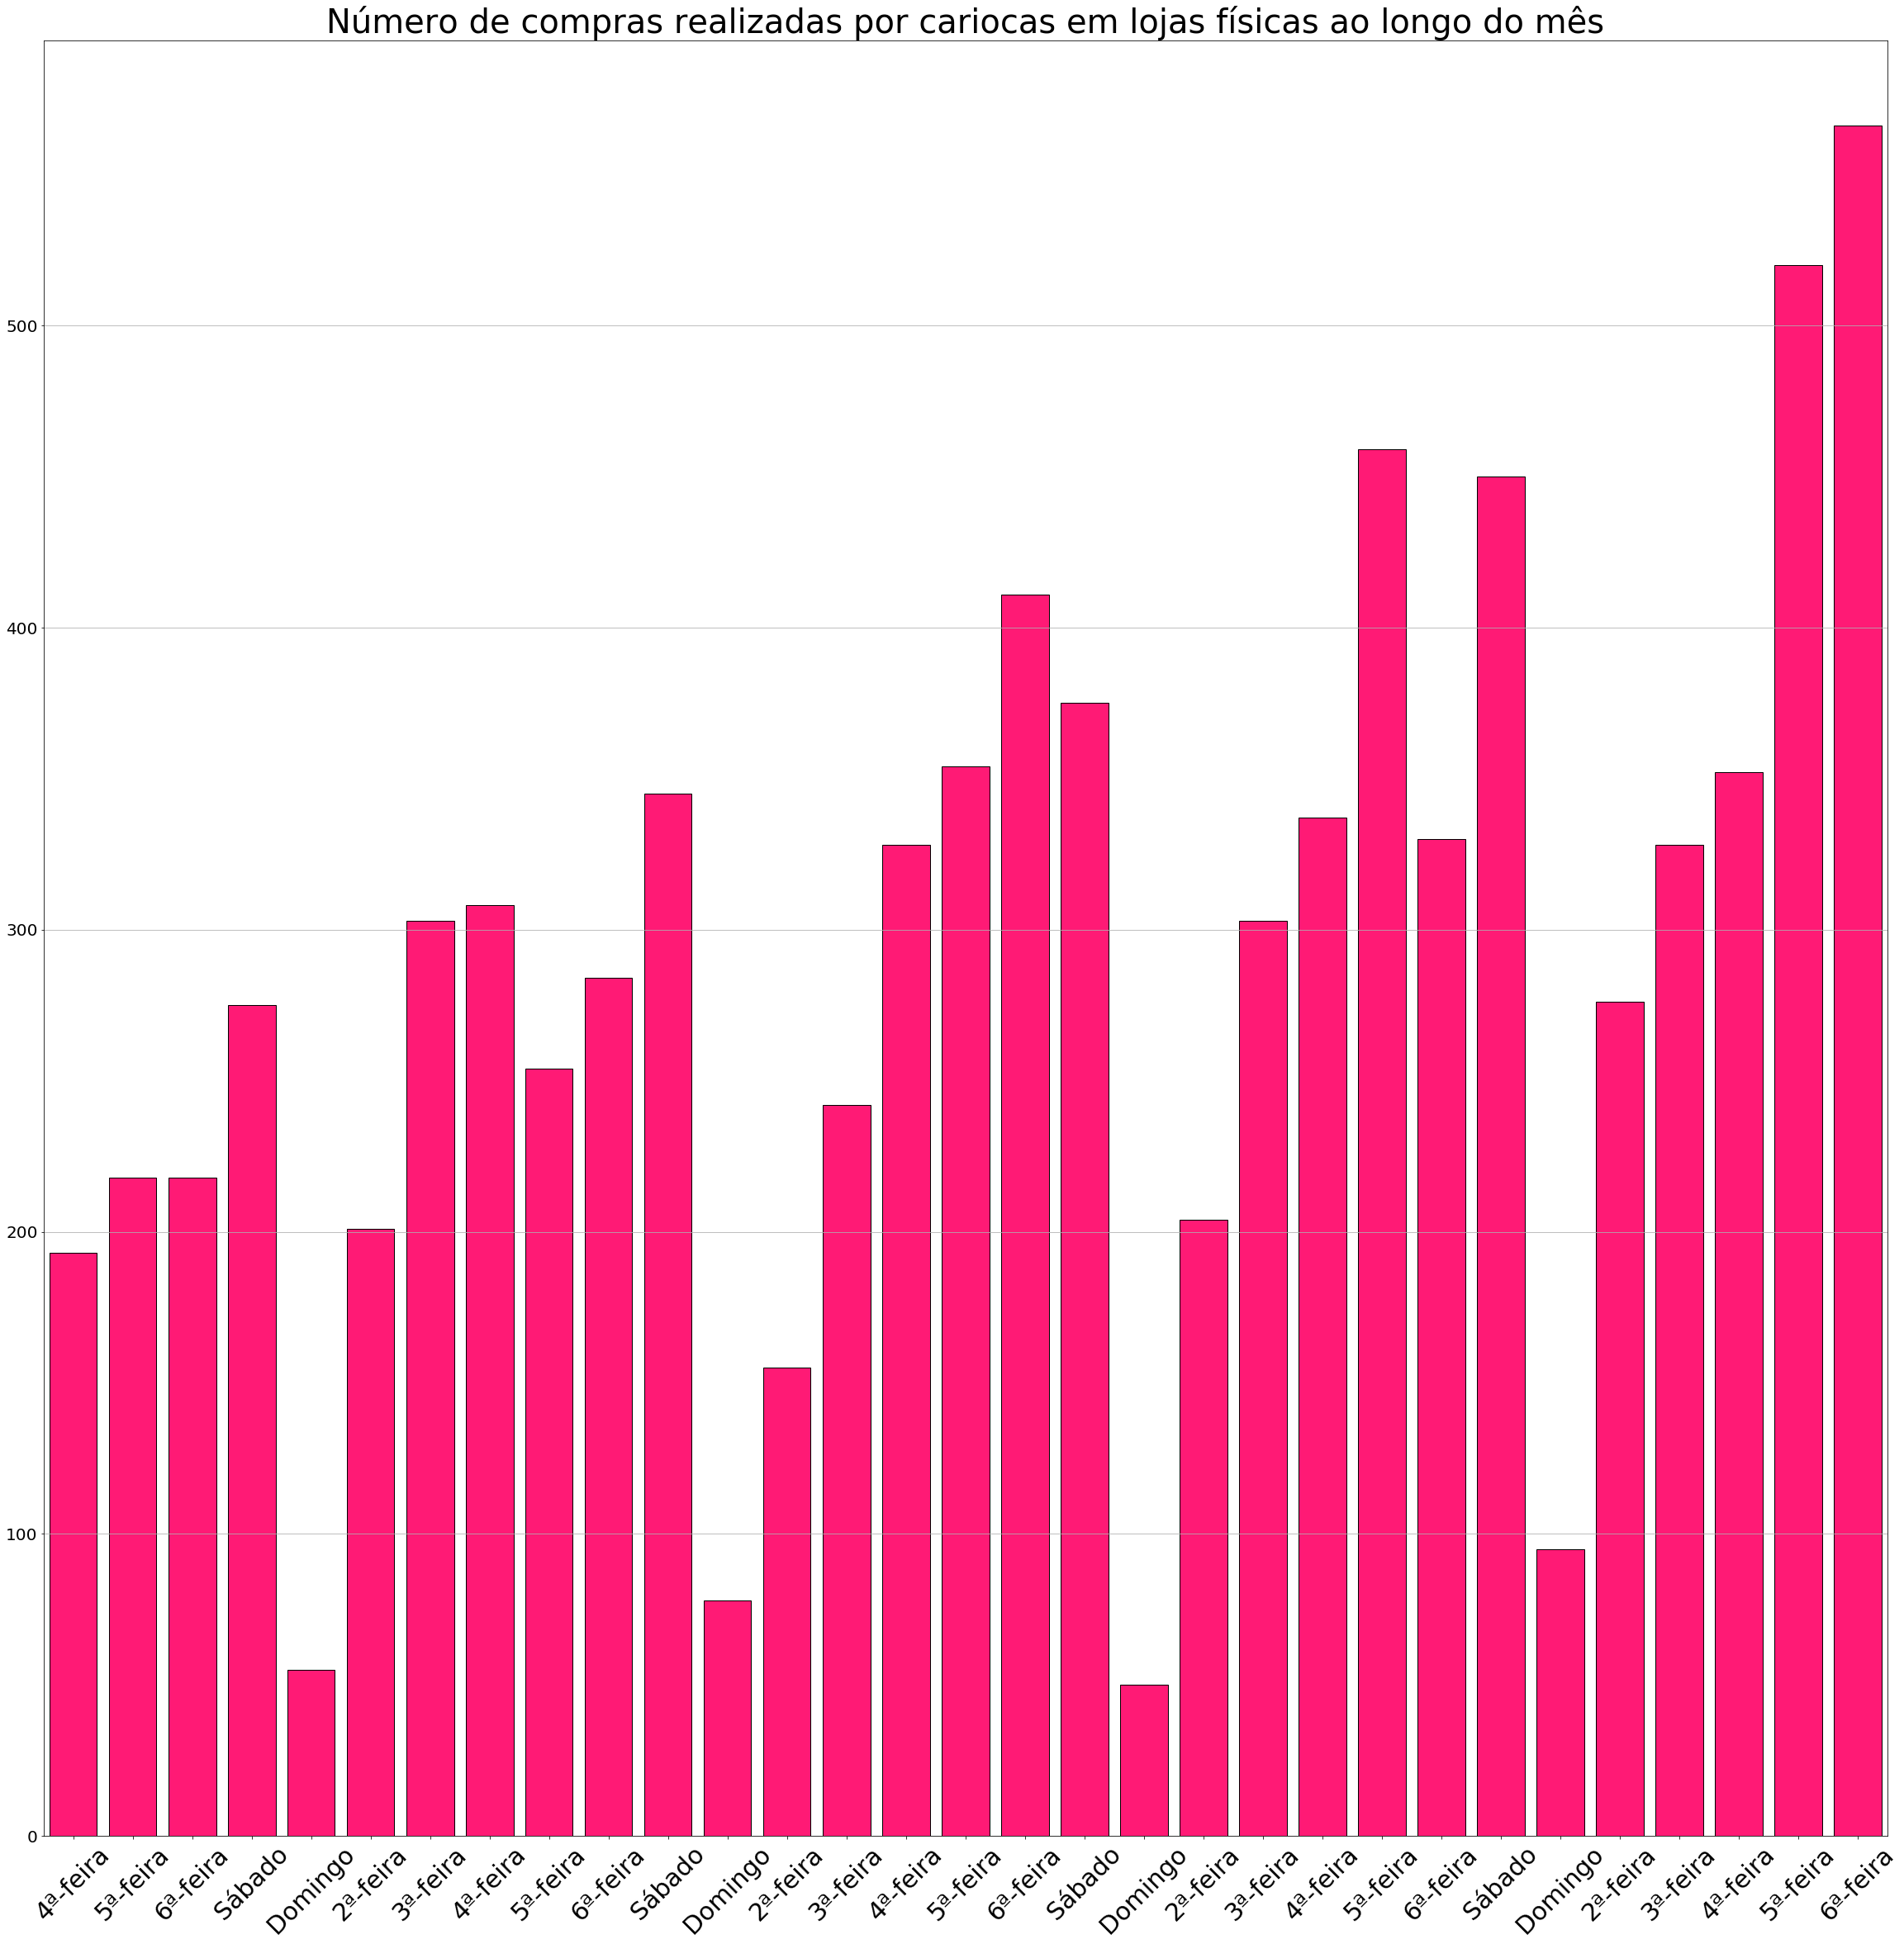

In [144]:
# Ainda analisando os cariocas, mas analisando o mês inteiro

g_income_rj_alldate_ofs = df_state_rj_ofs.groupby('date').count()

# Plot
my_index = ('4ª-feira','5ª-feira', '6ª-feira', 'Sábado','Domingo','2ª-feira','3ª-feira')*5
fig= plt.figure(figsize=(40,40))
plt.bar(np.arange(0.5,31.5),g_income_rj_alldate_ofs['price'], color="#ff1a75", ec='black') 
plt.xticks(np.arange(0.5,32.5),my_index, rotation=45, fontsize=30)
plt.yticks(fontsize=20)
plt.xlim(0,31)
plt.title("Número de compras realizadas por cariocas em lojas físicas ao longo do mês", fontsize=40)
plt.grid(b=True, axis='y')
plt.show() 

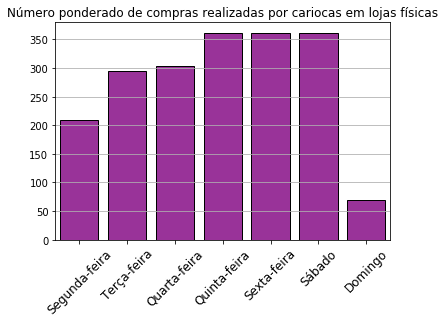

O número ponderado de compras realizadas por cariocas em lojas físicas nos finais de semana é igual a: 215.375
O número ponderado de compras realizadas por cariocas em lojas físicas nos dias de semana é igual a: 305.88


In [145]:
# Ainda analisando os cariocas (apenas a média por dia de semana novamente)
# mas ponderando o valor encontrado por dia da semana pelo número de vezes que 
# esse dia da semana aparece no mês analisado

# Como a variável counts_ofs já foi salva anteriormente com os valores do histograma original, temos:
counts_ofs[0] = counts_ofs[0] / 4 # segunda-feira aparece 4 vezes no mês 
counts_ofs[1] = counts_ofs[1] / 4 # terça-feira aparece 4 vezes no mês
counts_ofs[2] = counts_ofs[2] / 5 # quarta-feira aparece 5 vezes no mês
counts_ofs[3] = counts_ofs[3] / 5 # quinta-feira aparece 5 vezes no mês
counts_ofs[4] = counts_ofs[4] / 5 # sexta-feira aparece 5 vezes no mês
counts_ofs[5] = counts_ofs[5] / 4 # sábado aparece 4 vezes no mês
counts_ofs[6] = counts_ofs[6] / 4 # domingo aparece 4 vezes no mês


# Plot
my_index = ('Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira', 'Sexta-feira', 'Sábado','Domingo')
plt.bar(np.arange(0.5,7.5),counts_ofs, color="#993399", ec='black') 
plt.xticks(np.arange(0.5,7,1), my_index,rotation=45, fontsize=12)
plt.xlim(0,7)
plt.title("Número ponderado de compras realizadas por cariocas em lojas físicas")
plt.grid(b=True, axis='y')
plt.show() 

# Analisando agora a diferença entre as compras no final de semana e em dias de semana
# ponderou-se tanto pela aparição de cada dia da semana no mês de agosto
# quanto pelos dias de semana e pelo final de semana
rj_weekend_sales_ofs = (counts_ofs[5]+counts_ofs[6]) / 2
rj_weekday_sales_ofs = (counts_ofs[0]+counts_ofs[1]+counts_ofs[2]+counts_ofs[3]+counts_ofs[4]) / 5

print("O número ponderado de compras realizadas por cariocas em lojas físicas nos finais de semana é igual a:"
      ,rj_weekend_sales_ofs)
print("O número ponderado de compras realizadas por cariocas em lojas físicas nos dias de semana é igual a:"
      ,rj_weekday_sales_ofs)

### Análise do valor médio gasto por compra em cada região

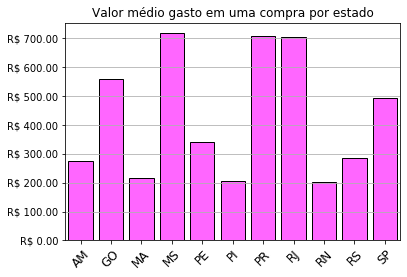

In [146]:
g_state_average_spend_ofs = df_ofs.groupby('state')['price_quantity'].mean()
# print(g_state_average_spend_ofs)

# Plot
my_index = tuple(g_state_average_spend_ofs.index)
values = g_state_average_spend_ofs.values
# fig= plt.figure(figsize=(10,10))
plt.bar(np.arange(0.5,11.5),values, color="#ff66ff", ec='black') 
plt.xticks(np.arange(0.5,12.5),my_index, rotation=45, fontsize=12)
plt.xlim(0,11)
plt.title("Valor médio gasto em uma compra por estado")
plt.grid(b=True, axis='y')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('R$ %.2f'))
plt.show() 

# Online Orders

Esta parte do código será referente à análise dos pedidos feitos no ecommerce. Sendo assim, todas as variáveis criadas terminarão com a silga **ono** para facilitar a identificação e escrita do código.

In [147]:
# Descobrir o número de linhas do arquivo
number_lines_ono = 0
with open('online_orders.json') as f:
    for line in f:
        number_lines_ono += 1

print("O número de linhas presente no arquivo ono é igual a:", number_lines_ono)

O número de linhas presente no arquivo ono é igual a: 12237


In [148]:
# Abrindo o arquivo json
df_ono = pd.read_json('online_orders.json',lines=True,dtype=False)

# Criando colunas que serão úteis depois
df_ono['price_quantity'] = df_ono['price'] * df_ono['quantity'] 
df_ono['weekday'] = df_ono['date'].dt.dayofweek

# Verificação das primeiras linhas
df_ono.head(10)


,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id,price_quantity,weekday
0,2018-08-01,3663323563643832383039356,desktop,363063373630306,323762666337343,1,839.0,None,839.0,2
1,2018-08-01,3430316531623964316332613,mobile,356664366366353,313562333039323,1,629.0,63393337303931353431,629.0,2
2,2018-08-01,3261343261306231336437393,desktop,313432656633333,383863346531623,1,219.0,37653631373639353439,219.0,2
3,2018-08-01,6437386532653732323563656,mobile,633236633438383,666136386663626,1,239.0,65333830303066373165,239.0,2
4,2018-08-01,6264656662326430346661616,desktop,623030326130383,626533383465323,1,69.0,None,69.0,2
5,2018-08-01,6638653965656263613238623,desktop,343136663661646,366464333539333,1,298.0,None,298.0,2
6,2018-08-01,6438323963376433356532633,desktop,353131646163336,373163626265643,1,598.0,None,598.0,2
7,2018-08-02,3933383761663335353034373,mobile,636536353265386,356466373137383,1,1798.0,61306161303630373135,1798.0,3
8,2018-08-02,6363363338623337663538353,mobile,363037313438636,383530353262626,1,428.0,62633265623261666566,428.0,3
9,2018-08-02,3761306638666637343734393,desktop,343238636534646,303936663162613,1,298.0,35623131306438343161,298.0,3


### Análise do faturamento

In [149]:
# Somando o faturamento das encomendas online 
income_ono = df_ono['price_quantity'].sum()

print("O faturamento das compras online nesse período foi de: R$", income_ono)

O faturamento das compras online nesse período foi de: R$ 5649323.0


### Análise do produto mais encomendado

In [150]:
# Descobrindo o número total de produtos existentes na tabela analisada
unique_on_product_id_ono = df_ono['on_product_id'].unique()
print('Número de on_product_id presentes no arquivo:',len(unique_on_product_id_ono))

# Descobrindo quais as possíveis quantidades existentes na tabela analisada
unique_quantity_ono = df_ono['quantity'].unique()
print('Número de quantidades presentes no arquivo:',unique_quantity_ono)

df_product_ono = df_ono[['on_product_id', 'quantity']].copy()

# Sabendo que as possíveis quantidades são 1 2 e 3:

df_product_1_ono = df_product_ono.loc[df_product_ono['quantity'] == 1]
df_product_2_ono = df_product_ono.loc[df_product_ono['quantity'] == 2]
df_product_3_ono = df_product_ono.loc[df_product_ono['quantity'] == 3]

frames = [df_product_1_ono, df_product_2_ono, df_product_2_ono, df_product_3_ono, df_product_3_ono, df_product_3_ono]

df_product_new_ono = pd.concat(frames, ignore_index=True)
# df_product_new_ono.tail(100)

count = df_product_1_ono['on_product_id'].value_counts() 
# print(count) 

product_max_ono = count.index[0]

print("\nO produto mais encomendado online foi o que possui on_product_id igual a:", product_max_ono)
print("O número de unidades vendidas desse produto foi:",count.values[0])

Número de on_product_id presentes no arquivo: 2184
Número de quantidades presentes no arquivo: [1 2 3]

O produto mais encomendado online foi o que possui on_product_id igual a: 626664333563363
O número de unidades vendidas desse produto foi: 74


### Análise do produto menos encomendado

In [151]:
# Já temos o número de produtos existentes em len(unique_on_product_id_ono)
product_min_ono = []

product_min_ono.append(count.index[len(unique_on_product_id_ono)-5])
product_min_ono.append(count.index[len(unique_on_product_id_ono)-4])
product_min_ono.append(count.index[len(unique_on_product_id_ono)-3])
product_min_ono.append(count.index[len(unique_on_product_id_ono)-2])
product_min_ono.append(count.index[len(unique_on_product_id_ono)-1])

print("\nOs produtos menos encomendados online foram os com product_id iguais a:\n", product_min_ono)


Os produtos menos encomendados online foram os com product_id iguais a:
 ['656364326237623', '356164376139646', '656336386334386', '633835653265316', '356437616566363']


### Análise sobre os cariocas gostarem de comprar no final de semana

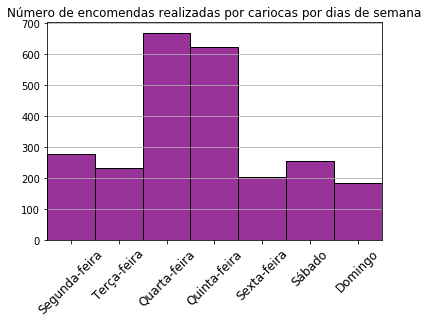

In [152]:
# Ainda temos o dataframe df_state_rj_ofs que é relacionado às compras em lojas físicas no estado do RJ
# Como o customer_id é igual tanto em lojas físicas como em encomendas online, podemos usar essa informação
# Primeiro temos que tirar os nulos para não dar problema - vamos perder um pouco de informação -- 233 pessoas

df_state_rj_ofs_withoutnone = df_state_rj_ofs.replace([None],0)
df_state_rj_ofs_withoutnone = df_state_rj_ofs_withoutnone.loc[df_state_rj_ofs_withoutnone['customer_id'] != 0]

# Retirar as colunas que não importam para esse caso e deixar os custumer_id únicos
df_state_rj_ofs_withoutnone = df_state_rj_ofs_withoutnone.drop(['date', 'off_product_id', 'price', 'quantity', 'sale_id', 
                                  'store_id', 'weekday'], axis=1)
unique_df_state_rj_ofs = df_state_rj_ofs_withoutnone['customer_id'].unique()

# Juntando as informações
df_state_rj_ono = pd.merge(df_state_rj_ofs_withoutnone, df_ono, how='inner', left_on='customer_id', right_on='customer_id')
df_state_rj_ono.head()

# Plot
bins = range(8)
plt.hist(df_state_rj_ono['weekday'], bins=bins, color="#993399", ec='black') 
plt.xticks(np.arange(0.5,7, 1),('Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira', 
                                  'Sexta-feira', 'Sábado','Domingo'), rotation=45, fontsize=12)
plt.xlim(0,7)
plt.title("Número de encomendas realizadas por cariocas por dias de semana")
plt.grid(b=True, axis='y')
plt.show()  

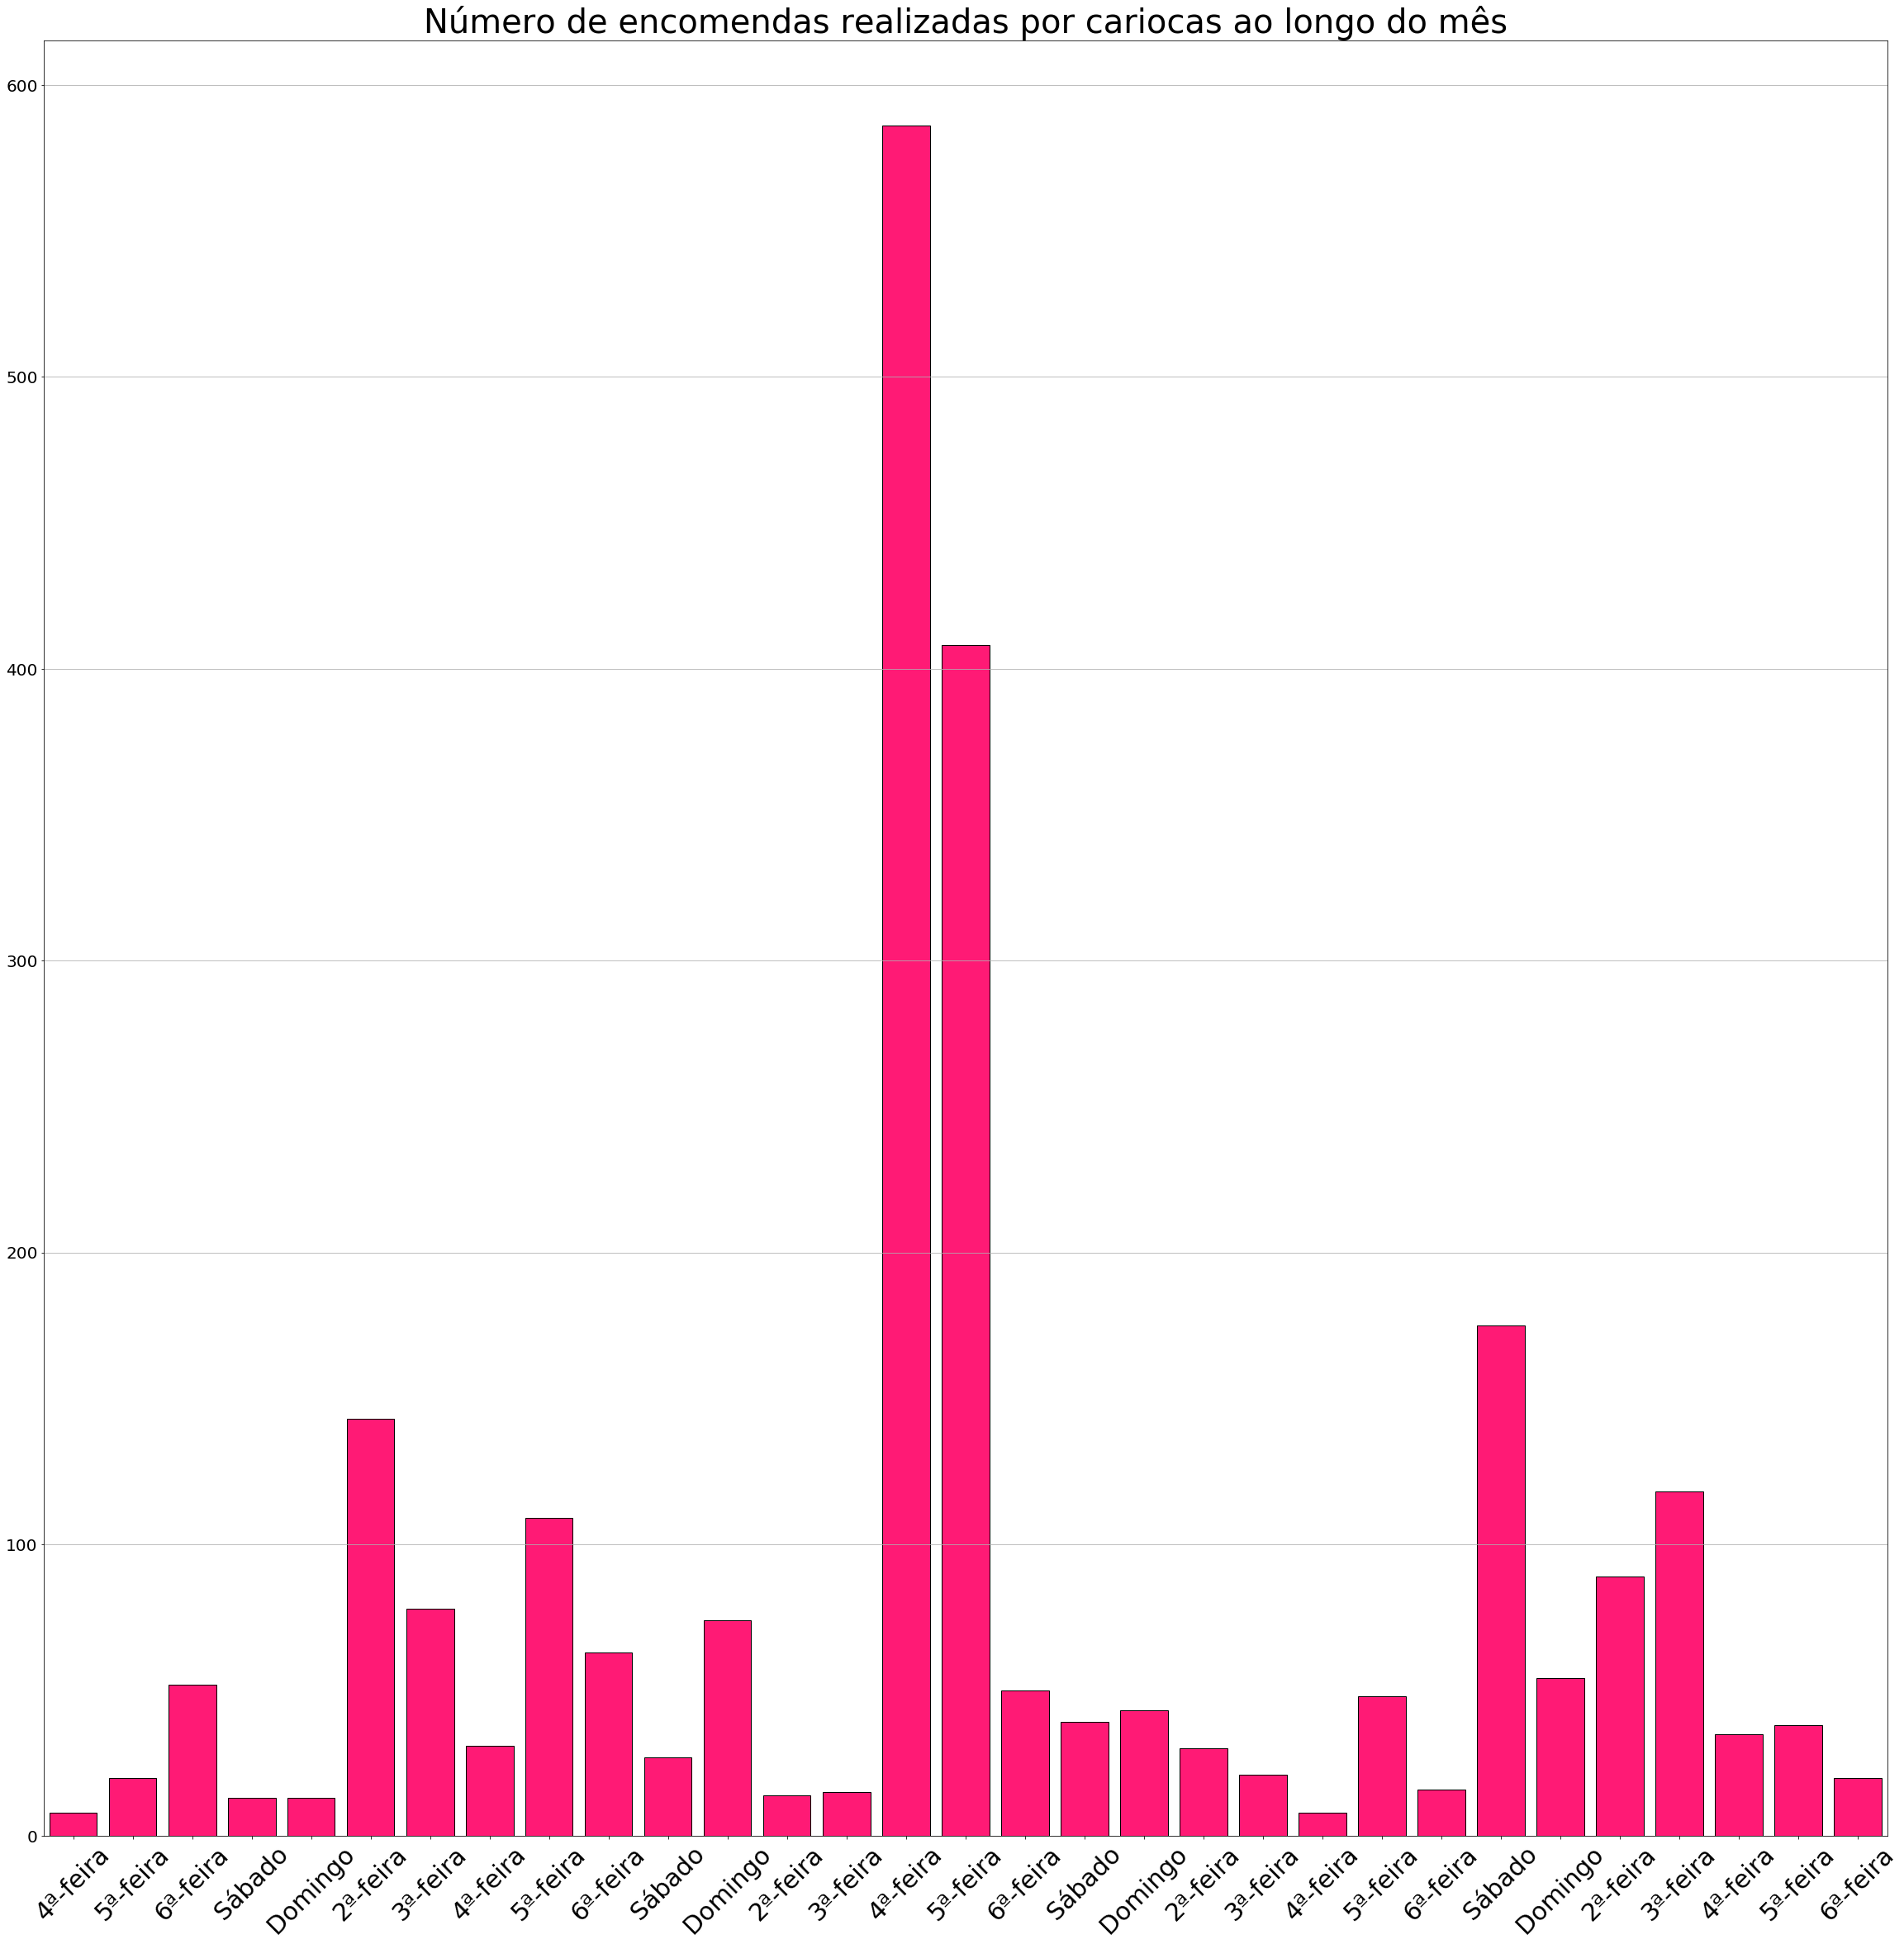

In [153]:
# Ainda analisando os cariocas, mas analisando o mês inteiro
g_income_rj_alldate_ono = df_state_rj_ono.groupby('date').count()

# Plot
my_ticks = ('4ª-feira','5ª-feira', '6ª-feira', 'Sábado','Domingo','2ª-feira','3ª-feira')*5
fig= plt.figure(figsize=(40,40))
plt.bar(np.arange(0.5,31.5),g_income_rj_alldate_ono['price'], color="#ff1a75", ec='black') 
plt.xticks(np.arange(0.5,32.5),my_ticks, rotation=45, fontsize=30)
plt.yticks(fontsize=20)
plt.xlim(0,31)
plt.title("Número de encomendas realizadas por cariocas ao longo do mês", fontsize=40)
plt.grid(b=True, axis='y')
plt.show() 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


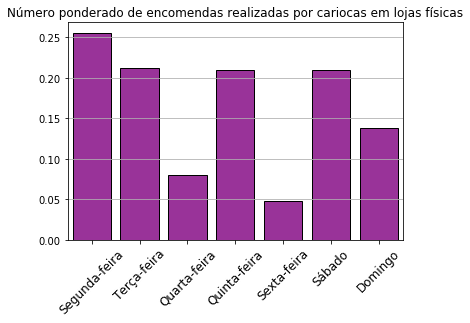

O número ponderado de compras realizadas por cariocas em lojas físicas nos finais de semana é igual a: 0.173828125
O número ponderado de compras realizadas por cariocas em lojas físicas nos dias de semana é igual a: 0.1612265


In [154]:
# Ainda analisando os cariocas (apenas a média por dia de semana novamente)
# mas ponderando o valor encontrado por dia da semana pelo número de vezes que 
# esse dia da semana aparece no mês analisado.
# Excluindo também os valores dos dias 15 e 16 de agosto 
# pois obtiveram valores absurdamente maiores que os outros dias

# A sigla nad significa not all dates

# Deletando as linhas referentes aos dias 15 e 16
df_income_rj_nad_ono = df_state_rj_ono[df_state_rj_ono.date != 
                                              g_income_rj_alldate_ono.index[14].date()] # quarta-feira

df_income_rj_nad_ono = df_income_rj_nad_ono[df_income_rj_nad_ono.date != 
                                              g_income_rj_alldate_ono.index[15].date()] # quinta-feira

# Para obter a variável counts_ono:
# bins = range(8)
# counts_ono, bins_ono, bars_ono = plt.hist(df_income_rj_nad_ono['weekday'], bins=bins, color="#993399", ec='black')

# Ponderando pela aparição do dia da semana no mês
counts_ono[0] = counts_ono[0] / 4 # segunda-feira aparece 4 vezes no mês 
counts_ono[1] = counts_ono[1] / 4 # terça-feira aparece 4 vezes no mês
counts_ono[2] = counts_ono[2] / 4 # quarta-feira aparece 4 vezes no mês
counts_ono[3] = counts_ono[3] / 4 # quinta-feira aparece 4 vezes no mês
counts_ono[4] = counts_ono[4] / 5 # sexta-feira aparece 5 vezes no mês
counts_ono[5] = counts_ono[5] / 4 # sábado aparece 4 vezes no mês
counts_ono[6] = counts_ono[6] / 4 # domingo aparece 4 vezes no mês


# Plot
my_index = ('Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira', 'Sexta-feira', 'Sábado','Domingo')
plt.bar(np.arange(0.5,7.5),counts_ono, color="#993399", ec='black') 
plt.xticks(np.arange(0.5,7,1), my_index,rotation=45, fontsize=12)
plt.xlim(0,7)
plt.title("Número ponderado de encomendas realizadas por cariocas em lojas físicas")
plt.grid(b=True, axis='y')
plt.show() 

# Analisando agora a diferença entre as compras no final de semana e em dias de semana
# ponderou-se tanto pela aparição de cada dia da semana no mês de agosto
# quanto pelos dias de semana e pelo final de semana
rj_weekend_sales_ono = (counts_ono[5]+counts_ono[6]) / 2
rj_weekday_sales_ono = (counts_ono[0]+counts_ono[1]+counts_ono[2]+counts_ono[3]+counts_ono[4]) / 5

print("O número ponderado de compras realizadas por cariocas em lojas físicas nos finais de semana é igual a:"
      ,rj_weekend_sales_ono)
print("O número ponderado de compras realizadas por cariocas em lojas físicas nos dias de semana é igual a:"
      ,rj_weekday_sales_ono)

### Análise do valor médio gasto por encomenda

O valor médio gasto por encomenda é de: R$ 461.6591484841056


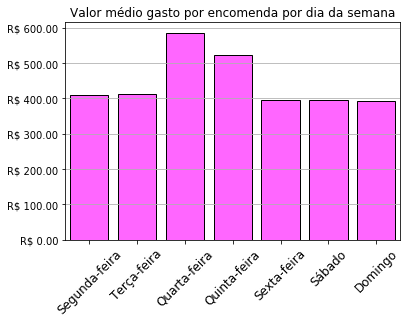

In [155]:
# Média de todos os valores
average_spend_ono = df_ono['price_quantity'].mean()
print("O valor médio gasto por encomenda é de: R$",average_spend_ono)

# Média por dias de semana
g_weekday_average_spend_ono = df_ono.groupby('weekday')['price_quantity'].mean()

# Plot
my_index = ('Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira', 'Sexta-feira', 'Sábado','Domingo')
values = g_weekday_average_spend_ono.values
# fig= plt.figure(figsize=(10,10))
plt.bar(np.arange(0.5,7.5),values, color="#ff66ff", ec='black') 
plt.xticks(np.arange(0.5,8.5), my_index, rotation=45, fontsize=12)
plt.xlim(0,7)
plt.title("Valor médio gasto por encomenda por dia da semana")
plt.grid(b=True, axis='y')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('R$ %.2f'))
plt.show() 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remov

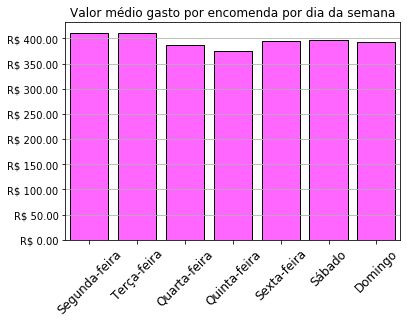

In [156]:
# Média por dias de semana desconsiderando a semana que apresenta os dois dias que destoaram
# A sigla "nad" no nome da variável significa "not all dates"


# Deletando as linhas referentes aos dias 15 e 16
df_weekday_average_spend_nad_ono = df_ono[df_ono.date != 
                                              g_income_rj_alldate_ono.index[14].date()] # quarta-feira

df_weekday_average_spend_nad_ono = df_weekday_average_spend_nad_ono[df_ono.date != 
                                              g_income_rj_alldate_ono.index[15].date()] # quinta-feira


g_weekday_average_spend_nad_ono = df_weekday_average_spend_nad_ono.groupby('weekday')['price_quantity'].mean()


# Plot
my_index = ('Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira', 'Sexta-feira', 'Sábado','Domingo')
values = g_weekday_average_spend_nad_ono.values
# fig= plt.figure(figsize=(10,10))
plt.bar(np.arange(0.5,7.5),values, color="#ff66ff", ec='black') 
plt.xticks(np.arange(0.5,8.5), my_index, rotation=45, fontsize=12)
plt.xlim(0,7)
plt.title("Valor médio gasto por encomenda por dia da semana")
plt.grid(b=True, axis='y')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('R$ %.2f'))
plt.show() 



# Online Pageviews

Esta parte do código será referente à análise das páginas visitadas do ecommerce. Sendo assim, todas as variáveis criadas terminarão com a silga **onp** para facilitar a identificação e escrita do código.

In [157]:
# Descobrir o número de linhas do arquivo
number_lines_onp = 0
with open('online_pageviews.json') as f:
    for line in f:
        number_lines_onp += 1

print("O número de linhas presente no arquivo onp é igual a:", number_lines_onp)

O número de linhas presente no arquivo onp é igual a: 3452540


### Análisar se é comum escolher online e terminar a compra na loja física

In [159]:
# Criando um dataframe vazio
columns_onp = ['date','visitor_id','deviceType','pageType','category_id','on_product_id','customer_id']

df1_pageType_product_onp = pd.DataFrame(columns=columns_onp)
df2_pageType_product_onp = pd.DataFrame(columns=columns_onp)
df3_pageType_product_onp = pd.DataFrame(columns=columns_onp)
df4_pageType_product_onp = pd.DataFrame(columns=columns_onp)
df5_pageType_product_onp = pd.DataFrame(columns=columns_onp)
df6_pageType_product_onp = pd.DataFrame(columns=columns_onp)
df7_pageType_product_onp = pd.DataFrame(columns=columns_onp)
df8_pageType_product_onp = pd.DataFrame(columns=columns_onp)
df9_pageType_product_onp = pd.DataFrame(columns=columns_onp)
df10_pageType_product_onp = pd.DataFrame(columns=columns_onp)
df11_pageType_product_onp = pd.DataFrame(columns=columns_onp)
df12_pageType_product_onp = pd.DataFrame(columns=columns_onp)

count = 0

# Abrindo o arquivo e selecionando apenas as linhas que apresentam pageType = product para a primeira análise
with open('online_pageviews.json') as f: 
    for line in f:
        new_line = line.replace("null", "None")
        df_newline = pd.DataFrame(eval(new_line), index=[0])
        
        if count > 3600000:
            break
            
        if df_newline['pageType'][0] == "product":
        
            if count <= 300000:
                df1_pageType_product_onp = pd.concat([df1_pageType_product_onp, df_newline], 
                                                         ignore_index=True)
            if 300000 < count <= 600000:
                df2_pageType_product_onp = pd.concat([df2_pageType_product_onp, df_newline], 
                                                         ignore_index=True)
            if 600000 < count <= 900000:
                df3_pageType_product_onp = pd.concat([df3_pageType_product_onp, df_newline], 
                                                         ignore_index=True)
            if 900000 < count <= 1200000:
                df4_pageType_product_onp = pd.concat([df4_pageType_product_onp, df_newline], 
                                                         ignore_index=True)
            if 1200000 < count <= 1500000:
                df5_pageType_product_onp = pd.concat([df5_pageType_product_onp, df_newline], 
                                                         ignore_index=True)
            if 1500000 < count <= 1800000:
                df6_pageType_product_onp = pd.concat([df6_pageType_product_onp, df_newline], 
                                                         ignore_index=True)
            if 1800000 < count <= 2100000:
                df7_pageType_product_onp = pd.concat([df7_pageType_product_onp, df_newline], 
                                                         ignore_index=True)
            if 2100000 < count <= 2400000:
                df8_pageType_product_onp = pd.concat([df8_pageType_product_onp, df_newline], 
                                                         ignore_index=True)
            if 2400000 < count <= 2700000:
                df9_pageType_product_onp = pd.concat([df9_pageType_product_onp, df_newline], 
                                                         ignore_index=True)     
            if 2700000 < count <= 3000000:
                df10_pageType_product_onp = pd.concat([df10_pageType_product_onp, df_newline], 
                                                         ignore_index=True)
            if 3000000 < count <= 3300000:
                df11_pageType_product_onp = pd.concat([df11_pageType_product_onp, df_newline], 
                                                         ignore_index=True) 
            if 3300000 < count <= 3600000:
                df11_pageType_product_onp = pd.concat([df11_pageType_product_onp, df_newline], 
                                                         ignore_index=True)             
       
        count += 1
        print(count)

In [42]:
# Salvando o daraframe para não precisar refazê-lo de novo
df1_pageType_product_onp.to_pickle("df1_pageType_product_onp.pkl")  
df2_pageType_product_onp.to_pickle("df2_pageType_product_onp.pkl") 
df3_pageType_product_onp.to_pickle("df3_pageType_product_onp.pkl") 
df4_pageType_product_onp.to_pickle("df4_pageType_product_onp.pkl") 
df5_pageType_product_onp.to_pickle("df5_pageType_product_onp.pkl") 
df6_pageType_product_onp.to_pickle("df6_pageType_product_onp.pkl") 
df7_pageType_product_onp.to_pickle("df7_pageType_product_onp.pkl") 
df8_pageType_product_onp.to_pickle("df8_pageType_product_onp.pkl") 
df9_pageType_product_onp.to_pickle("df9_pageType_product_onp.pkl") 
df10_pageType_product_onp.to_pickle("df10_pageType_product_onp.pkl") 
df11_pageType_product_onp.to_pickle("df11_pageType_product_onp.pkl") 
df12_pageType_product_onp.to_pickle("df12_pageType_product_onp.pkl") 

In [100]:
# Abrindo o dataframe salvo anteriormente  
df1_pageType_product_onp = pd.read_pickle("df1_pageType_product_onp.pkl")  
df2_pageType_product_onp = pd.read_pickle("df2_pageType_product_onp.pkl") 
df3_pageType_product_onp = pd.read_pickle("df3_pageType_product_onp.pkl") 
df4_pageType_product_onp = pd.read_pickle("df4_pageType_product_onp.pkl") 
# df5_pageType_product_onp = pd.read_pickle("df5_pageType_product_onp.pkl") 
df6_pageType_product_onp = pd.read_pickle("df6_pageType_product_onp.pkl") 
df7_pageType_product_onp = pd.read_pickle("df7_pageType_product_onp.pkl") 
df8_pageType_product_onp = pd.read_pickle("df8_pageType_product_onp.pkl") 
df9_pageType_product_onp = pd.read_pickle("df9_pageType_product_onp.pkl") 
df10_pageType_product_onp = pd.read_pickle("df10_pageType_product_onp.pkl") 
df11_pageType_product_onp = pd.read_pickle("df11_pageType_product_onp.pkl") 
df12_pageType_product_onp = pd.read_pickle("df12_pageType_product_onp.pkl") 

In [163]:
# # Primeiro temos que tirar os nulos da df_ofs e de todas os data frames criados
# # para não dar problema - vamos perder um pouco de informação

# df_ofs_withoutnone = df_ofs.replace([None],0)
# df_ofs_withoutnone = df_ofs_withoutnone.loc[df_ofs_withoutnone['customer_id'] != 0]
# df_ofs_withoutnone = df_ofs_withoutnone.loc[df_ofs_withoutnone['on_product_id'] != 0]

# # df1
# df1_pageType_product_onp_withoutnone = df1_pageType_product_onp.replace([None],0)
# df1_pageType_product_onp_withoutnone = df1_pageType_product_onp_withoutnone.loc[df1_pageType_product_onp_withoutnone['customer_id'] 
#                                                                                 != 0]
# df1_pageType_product_onp_withoutnone = df1_pageType_product_onp_withoutnone.loc[df1_pageType_product_onp_withoutnone['on_product_id'] 
#                                                                                 != 0]

# #df2
# df2_pageType_product_onp_withoutnone = df2_pageType_product_onp.replace([None],0)
# df2_pageType_product_onp_withoutnone = df2_pageType_product_onp_withoutnone.loc[df2_pageType_product_onp_withoutnone['customer_id'] 
#                                                                                 != 0]
# df2_pageType_product_onp_withoutnone = df2_pageType_product_onp_withoutnone.loc[df2_pageType_product_onp_withoutnone['on_product_id'] 
#                                                                                 != 0]

# #df3
# df3_pageType_product_onp_withoutnone = df3_pageType_product_onp.replace([None],0)
# df3_pageType_product_onp_withoutnone = df3_pageType_product_onp_withoutnone.loc[df3_pageType_product_onp_withoutnone['customer_id'] 
#                                                                                 != 0]
# df3_pageType_product_onp_withoutnone = df3_pageType_product_onp_withoutnone.loc[df3_pageType_product_onp_withoutnone['on_product_id'] 
#                                                                                 != 0]

# #df4
# df4_pageType_product_onp_withoutnone = df4_pageType_product_onp.replace([None],0)
# df4_pageType_product_onp_withoutnone = df4_pageType_product_onp_withoutnone.loc[df4_pageType_product_onp_withoutnone['customer_id'] 
#                                                                                 != 0]
# df4_pageType_product_onp_withoutnone = df4_pageType_product_onp_withoutnone.loc[df4_pageType_product_onp_withoutnone['on_product_id'] 
#                                                                                 != 0]

# #df5
# df5_pageType_product_onp_withoutnone = df5_pageType_product_onp.replace([None],0)
# df5_pageType_product_onp_withoutnone = df5_pageType_product_onp_withoutnone.loc[df5_pageType_product_onp_withoutnone['customer_id'] 
#                                                                                 != 0]
# df5_pageType_product_onp_withoutnone = df5_pageType_product_onp_withoutnone.loc[df5_pageType_product_onp_withoutnone['on_product_id'] 
#                                                                                 != 0]

# #df6
# df6_pageType_product_onp_withoutnone = df6_pageType_product_onp.replace([None],0)
# df6_pageType_product_onp_withoutnone = df6_pageType_product_onp_withoutnone.loc[df6_pageType_product_onp_withoutnone['customer_id'] 
#                                                                                 != 0]
# df6_pageType_product_onp_withoutnone = df6_pageType_product_onp_withoutnone.loc[df6_pageType_product_onp_withoutnone['on_product_id'] 
#                                                                                 != 0]

# #df7
# df7_pageType_product_onp_withoutnone = df7_pageType_product_onp.replace([None],0)
# df7_pageType_product_onp_withoutnone = df7_pageType_product_onp_withoutnone.loc[df7_pageType_product_onp_withoutnone['customer_id'] 
#                                                                                 != 0]
# df7_pageType_product_onp_withoutnone = df7_pageType_product_onp_withoutnone.loc[df7_pageType_product_onp_withoutnone['on_product_id'] 
#                                                                                 != 0]

# #df8
# df8_pageType_product_onp_withoutnone = df8_pageType_product_onp.replace([None],0)
# df8_pageType_product_onp_withoutnone = df8_pageType_product_onp_withoutnone.loc[df8_pageType_product_onp_withoutnone['customer_id'] 
#                                                                                 != 0]
# df8_pageType_product_onp_withoutnone = df8_pageType_product_onp_withoutnone.loc[df8_pageType_product_onp_withoutnone['on_product_id'] 
#                                                                                 != 0]

# #df9
# df9_pageType_product_onp_withoutnone = df9_pageType_product_onp.replace([None],0)
# df9_pageType_product_onp_withoutnone = df9_pageType_product_onp_withoutnone.loc[df9_pageType_product_onp_withoutnone['customer_id'] 
#                                                                                 != 0]
# df9_pageType_product_onp_withoutnone = df9_pageType_product_onp_withoutnone.loc[df9_pageType_product_onp_withoutnone['on_product_id'] 
#                                                                                 != 0]

# #df10
# df10_pageType_product_onp_withoutnone = df10_pageType_product_onp.replace([None],0)
# df10_pageType_product_onp_withoutnone = df10_pageType_product_onp_withoutnone.loc[df10_pageType_product_onp_withoutnone['customer_id'] 
#                                                                                 != 0]
# df10_pageType_product_onp_withoutnone = df10_pageType_product_onp_withoutnone.loc[df10_pageType_product_onp_withoutnone['on_product_id'] 
#                                                                                 != 0]

# #df11
# df11_pageType_product_onp_withoutnone = df11_pageType_product_onp.replace([None],0)
# df11_pageType_product_onp_withoutnone = df11_pageType_product_onp_withoutnone.loc[df11_pageType_product_onp_withoutnone['customer_id'] 
#                                                                                 != 0]
# df11_pageType_product_onp_withoutnone = df11_pageType_product_onp_withoutnone.loc[df11_pageType_product_onp_withoutnone['on_product_id'] 
#                                                                                 != 0]

# #df12
# df12_pageType_product_onp_withoutnone = df12_pageType_product_onp.replace([None],0)
# df12_pageType_product_onp_withoutnone = df12_pageType_product_onp_withoutnone.loc[df12_pageType_product_onp_withoutnone['customer_id'] 
#                                                                                 != 0]
# df12_pageType_product_onp_withoutnone = df12_pageType_product_onp_withoutnone.loc[df12_pageType_product_onp_withoutnone['on_product_id'] 
#                                                                                 != 0]


### Análise sobre o cupom de 20%

In [105]:
# Criando um dataframe vazio
columns_onp = ['date','visitor_id','deviceType','pageType','category_id','on_product_id','customer_id']

df_pageType_cart_onp = pd.DataFrame(columns=columns_onp)
count = 0  

# Abrindo o arquivo e selecionando apenas as linhas que apresentam pageType = cart para a segunda análise
with open('online_pageviews/online_pageviews.json') as f: 
    for line in f:      
        new_line = line.replace("null", "None")
        df_newline = pd.DataFrame(eval(new_line), index=[0])

        if df_newline['pageType'][0] == "cart":
            df_pageType_cart_onp = pd.concat([df_pageType_cart_onp, df_newline], 
                                                ignore_index=True)
        count += 1
        print("count:",count,"\ttamanho do data frame:",df_pageType_cart_onp.shape[0])
        
        if count == 3500000:
            break

In [106]:
# Salvando o daraframe para não precisar refazê-lo de novo
df_pageType_cart_onp.to_pickle("df_pageType_cart_onp.pkl")  

In [161]:
# Abrindo o dataframe salvo anteriormente  
df_pageType_cart_onp = pd.read_pickle("df_pageType_cart_onp.pkl")
df_pageType_cart_onp.head()

,date,visitor_id,deviceType,pageType,category_id,on_product_id,customer_id
0,2018-08-01,3132633361343664313237356,mobile,cart,None,None,None
1,2018-08-01,3763393838363439633837623,desktop,cart,None,None,37653631373639353439
2,2018-08-01,3932373537616130643662343,desktop,cart,None,None,None
3,2018-08-02,6238653935323064383462623,desktop,cart,None,None,None
4,2018-08-02,3364393634666262613963666,desktop,cart,None,None,None


In [133]:
# Como o customer_id é igual em todos os arquivos, podemos usar essa informação

# Primeiro temos que tirar os nulos da df_pageType_cart_onp 
df_pageType_cart_onp_withoutnone = df_pageType_cart_onp.replace([None],0)
df_pageType_cart_onp_withoutnone = df_pageType_cart_onp_withoutnone.loc[df_pageType_cart_onp_withoutnone['customer_id'] != 0]
df_pageType_cart_onp_withoutnone = df_pageType_cart_onp_withoutnone.loc[df_pageType_cart_onp_withoutnone['on_product_id'] != 0]

# Retirar as colunas que não importam para esse caso
df_pageType_cart_onp_withoutnone = df_pageType_cart_onp_withoutnone.drop(['date', 'visitor_id', 'deviceType', 'category_id'],
                                                                         axis=1)
# df_ofs_withoutnone = df_ofs_withoutnone.drop(['date','visitor_id','deviceType','order_id','quantity', 'price', 'weekday'],
#                                             axis=1)

df_pageType_cart_leftthecart_onp = df_pageType_cart_onp_withoutnone.merge(df_ofs_withoutnone,how='outer',left_on='customer_id', 
                                                                          right_on='customer_id')

# # Selecionar apenas os customer_id que estão no data frame df_pageType_cart_onp porém não realizaram a compra
# df_pageType_cart_leftthecart_onp = df_pageType_cart_leftthecart_onp.loc[df_pageType_cart_leftthecart_onp['price_quantity'] 
#                                                                         == "Nan"]

df_pageType_cart_onp_withoutnone.head(200)

,date,visitor_id,deviceType,pageType,category_id,on_product_id,customer_id


## Análises Gerais

### Análise do Faturamento

In [162]:
income_total = income_ofs + income_ono

print("O faturamento total neste período foi de: R$", income_total)

O faturamento total neste período foi de: R$ 19552328.32
